# Identifying Apples vs Oranges using Deep Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

## Building CNN

### Importing Tensorflow 

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

### Detecting the GPU

In [3]:
# Detecting whether keras API using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Importing the Images using Image-Generator function of Keras API

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'apples_or_tomatoes\train',
        target_size=(64, 64),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'apples_or_tomatoes\test',
        target_size=(64, 64),
        batch_size=10,
        class_mode='binary')

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


### Visualising the dataset

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AttributeError: 'ImageDataGenerator' object has no attribute 'take'

<Figure size 1000x1000 with 0 Axes>

### Creating model using Tensorflow and later compiling it

In [25]:
# We generally start with 32 feature detectors/filters since some use CPUs
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=128, kernel_size= (3,3), kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu, padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Conv2D(filters=256, kernel_size= (3,3), kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu, padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128,kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.sigmoid)])

In [26]:
# Compiling the CNN
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics = ['accuracy'])

In [27]:
history = model.fit(
        train_generator,
        steps_per_epoch=int(294/10),
        epochs=40,
        validation_data=validation_generator,
        validation_steps=int(97/10))

Epoch 1/40
29/29 [==============================] - 2s 36ms/step - loss: 1.3542 - accuracy: 0.5669 - val_loss: 0.6509 - val_accuracy: 0.6111
Epoch 2/40
29/29 [==============================] - 1s 20ms/step - loss: 0.6223 - accuracy: 0.6796 - val_loss: 0.6280 - val_accuracy: 0.6556
Epoch 3/40
29/29 [==============================] - 1s 19ms/step - loss: 0.6118 - accuracy: 0.6655 - val_loss: 0.6389 - val_accuracy: 0.6222
Epoch 4/40
29/29 [==============================] - 1s 20ms/step - loss: 0.6071 - accuracy: 0.6796 - val_loss: 0.6636 - val_accuracy: 0.6333
Epoch 5/40
29/29 [==============================] - 1s 20ms/step - loss: 0.5904 - accuracy: 0.6514 - val_loss: 0.6059 - val_accuracy: 0.6889
Epoch 6/40
29/29 [==============================] - 1s 20ms/step - loss: 0.5856 - accuracy: 0.6937 - val_loss: 0.5990 - val_accuracy: 0.6778
Epoch 7/40
29/29 [==============================] - 1s 20ms/step - loss: 0.5778 - accuracy: 0.6901 - val_loss: 0.5942 - val_accuracy: 0.7222
Epoch 8/40
29

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

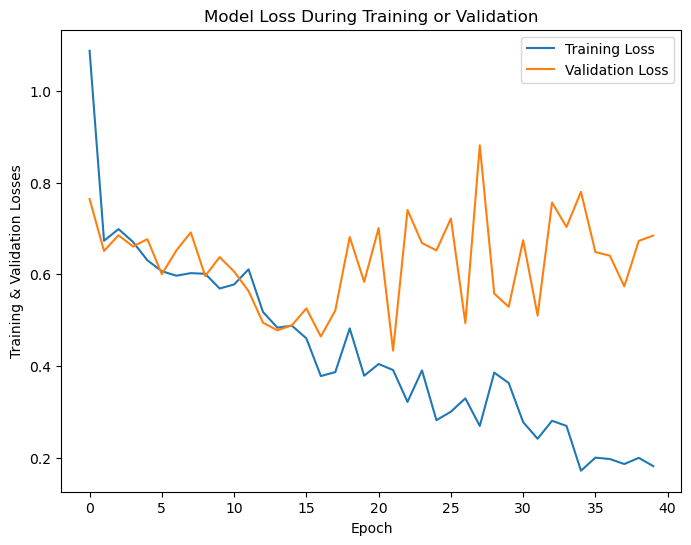

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])